In [5]:
%pip install seaborn
%pip install shap imblearn
# %pip install ipywidgets==7.7.2

import sys
import os
sys.path.append(os.path.abspath('../src'))

import importlib
import utils
importlib.reload(utils)

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


<module 'utils' from '/mnt/batch/tasks/shared/LS_root/mounts/clusters/c1-eloise/code/Users/iam.hsiang/Diagnostic_C_Biomarker/src/utils.py'>

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint, uniform
import joblib
from imblearn.over_sampling import SMOTE

from utils import load_data, preprocess_data, custom_scorer, train_and_evaluate_model, plot_feature_importance, plot_confusion_matrix, plot_learning_curve

In [7]:
# Load data for each feature set
feature_sets = ['../Data/Features/Random_Forest.csv', '../Data/Features/RF_MI_Union.csv', 
                '../Data/Features/RF_MI_Intersection.csv',
                '../Data/Features/NSCLC_biomarkers_de_analysis.csv', 
                '../Data/Features/NSCLC_biomarkers_50_de_analysis.csv',
                '../Data/Features/RF_MI_DE_Union.csv',
                '../Data/Features/MI_DE_Intersection.csv',
                '../Data/Features/RF_DE_Intersection.csv',
               ]

expression_path = '../Data/Processed/NSCLC_expression_model_training.csv'
labels_path = '../Data/Processed/NSCLC_labels_model_training.csv'

Processing feature set: ../Data/Features/Random_Forest.csv
Initial model performance:
Accuracy: 0.9640
AUC-ROC: 0.9983
Cross-validation scores: 0.9538 (+/- 0.0229)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       108
           1       0.96      0.96      0.96       100
           2       1.00      1.00      1.00        14

    accuracy                           0.96       222
   macro avg       0.97      0.97      0.97       222
weighted avg       0.96      0.96      0.96       222

Best parameters found: {'kernel': 'rbf', 'gamma': 'auto', 'degree': 3, 'class_weight': 'balanced', 'C': 10}

Tuned model performance:
Accuracy: 0.9685
AUC-ROC: 0.9954
Cross-validation scores: 0.9493 (+/- 0.0187)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       108
           1       0.96      0.97      0.97       100
           2       1.00      1

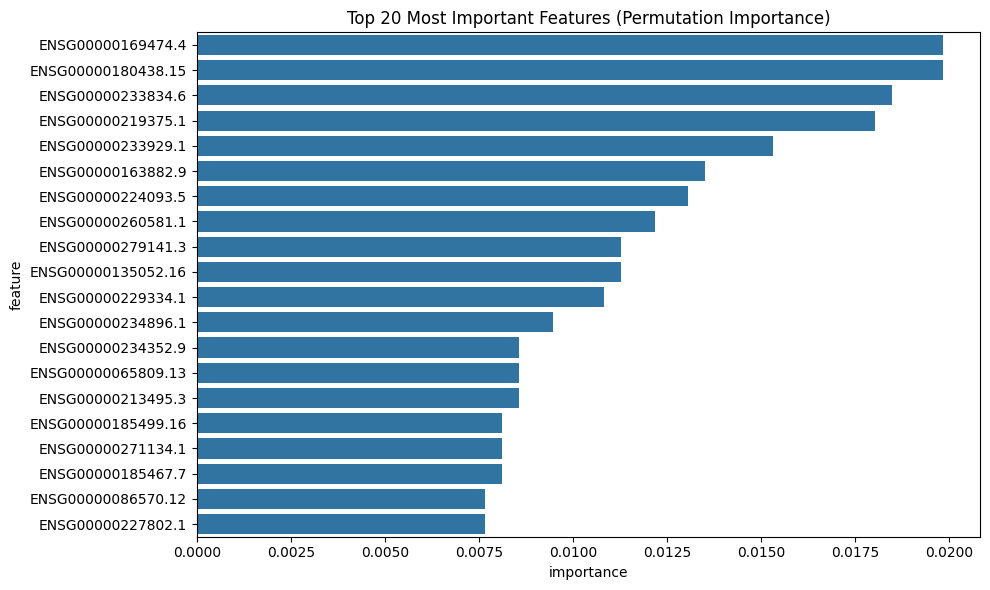

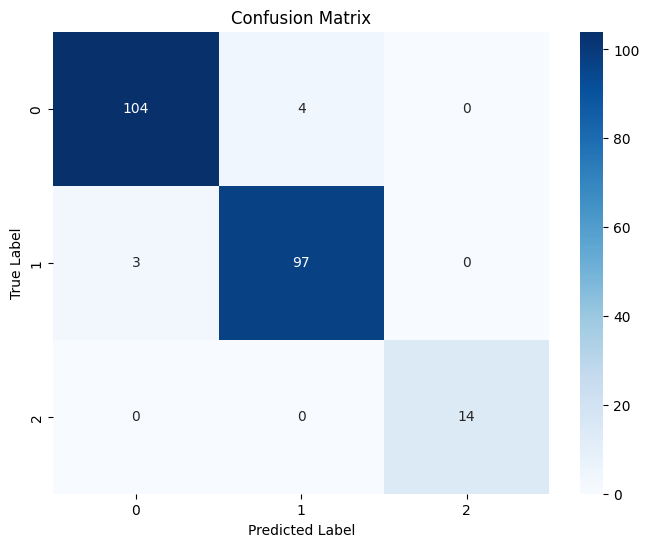

Processing feature set: ../Data/Features/RF_MI_Union.csv
Initial model performance:
Accuracy: 0.9730
AUC-ROC: 0.9984
Cross-validation scores: 0.9527 (+/- 0.0152)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.98      0.96      0.97       100
           2       1.00      1.00      1.00        14

    accuracy                           0.97       222
   macro avg       0.98      0.98      0.98       222
weighted avg       0.97      0.97      0.97       222

Best parameters found: {'kernel': 'linear', 'gamma': 1, 'degree': 2, 'class_weight': 'balanced', 'C': 0.1}

Tuned model performance:
Accuracy: 0.9595
AUC-ROC: 0.9972
Cross-validation scores: 0.9549 (+/- 0.0141)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96       108
           1       0.94      0.97      0.96       100
           2       1.00      1.00

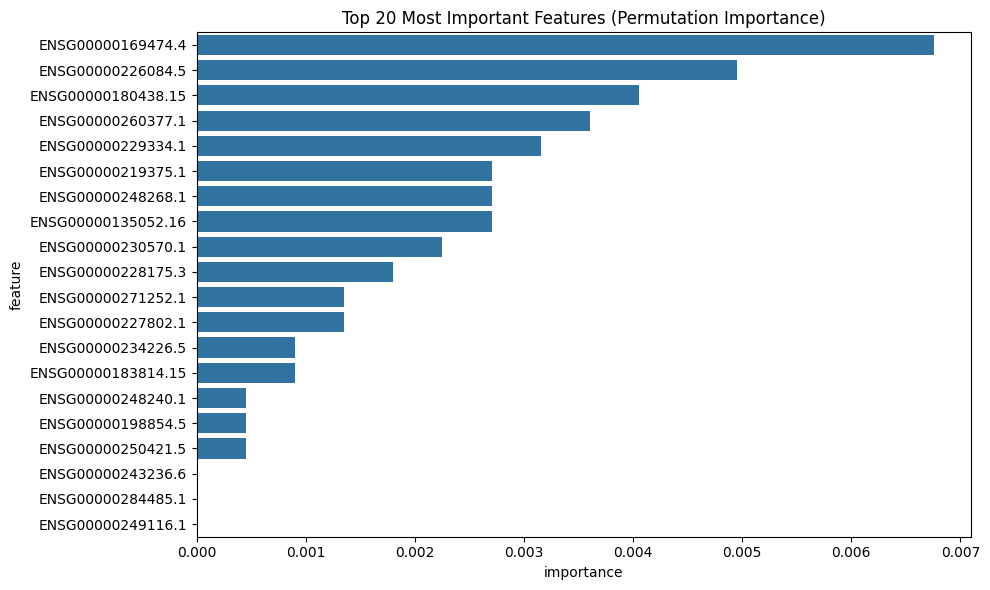

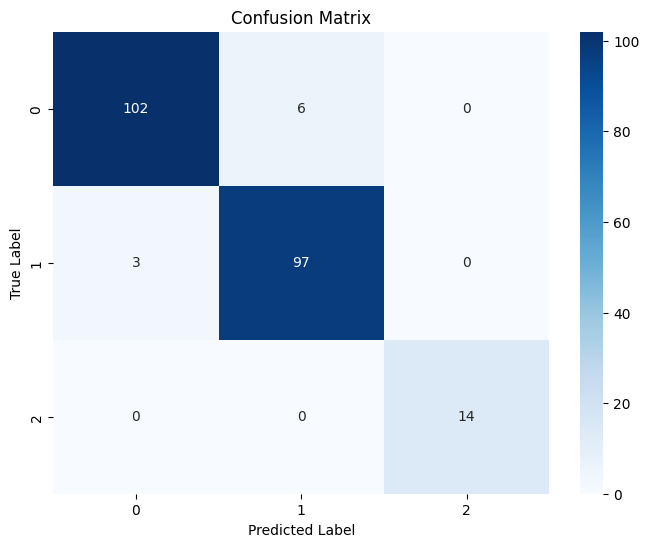

Processing feature set: ../Data/Features/RF_MI_Intersection.csv
Initial model performance:
Accuracy: 0.9640
AUC-ROC: 0.9975
Cross-validation scores: 0.9482 (+/- 0.0279)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       108
           1       0.96      0.96      0.96       100
           2       1.00      1.00      1.00        14

    accuracy                           0.96       222
   macro avg       0.97      0.97      0.97       222
weighted avg       0.96      0.96      0.96       222

Best parameters found: {'kernel': 'rbf', 'gamma': 'auto', 'degree': 2, 'class_weight': 'balanced', 'C': 1}

Tuned model performance:
Accuracy: 0.9640
AUC-ROC: 0.9976
Cross-validation scores: 0.9470 (+/- 0.0307)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       108
           1       0.96      0.96      0.96       100
           2       1.00   

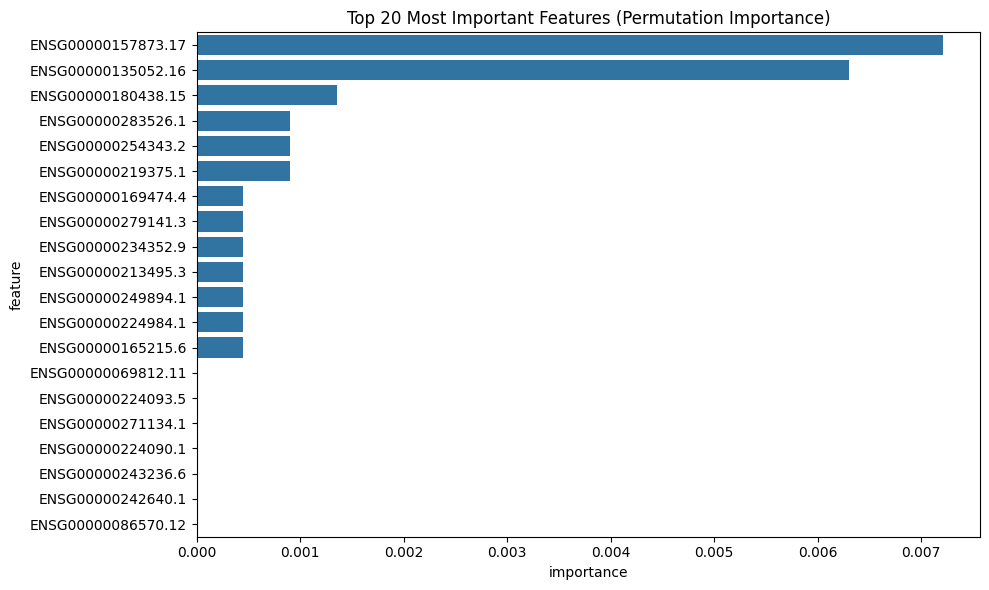

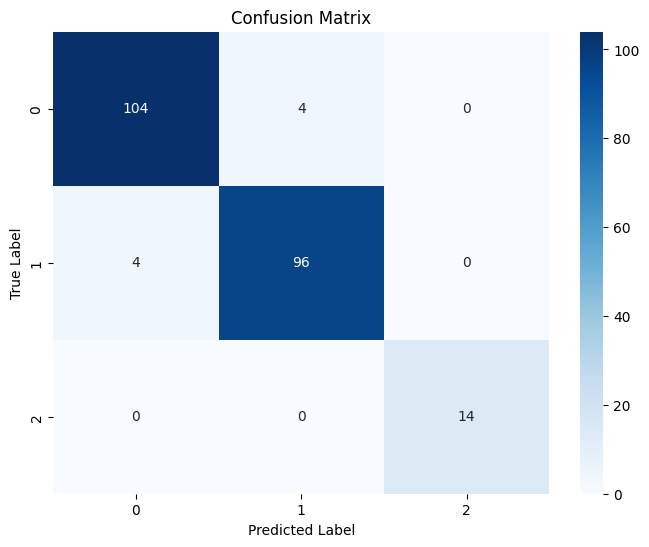

Processing feature set: ../Data/Features/NSCLC_biomarkers_de_analysis.csv
Initial model performance:
Accuracy: 0.9234
AUC-ROC: 0.9830
Cross-validation scores: 0.8997 (+/- 0.0278)

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       108
           1       0.92      0.91      0.91       100
           2       1.00      1.00      1.00        14

    accuracy                           0.92       222
   macro avg       0.95      0.95      0.95       222
weighted avg       0.92      0.92      0.92       222

Best parameters found: {'kernel': 'rbf', 'gamma': 'auto', 'degree': 2, 'class_weight': None, 'C': 10}

Tuned model performance:
Accuracy: 0.9369
AUC-ROC: 0.9865
Cross-validation scores: 0.8985 (+/- 0.0274)

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       108
           1       0.93      0.93      0.93       100
           2       1.

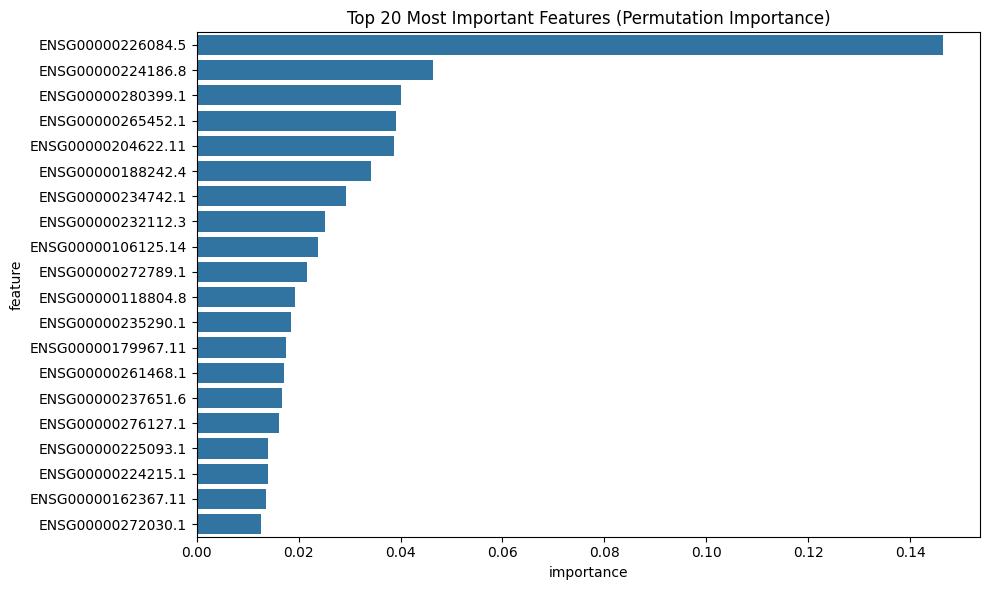

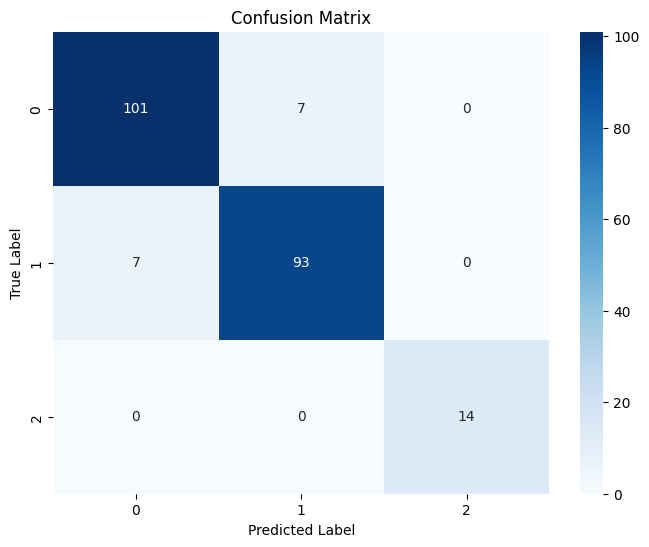

Processing feature set: ../Data/Features/NSCLC_biomarkers_50_de_analysis.csv
Initial model performance:
Accuracy: 0.8919
AUC-ROC: 0.9729
Cross-validation scores: 0.8501 (+/- 0.0216)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       108
           1       0.89      0.87      0.88       100
           2       1.00      1.00      1.00        14

    accuracy                           0.89       222
   macro avg       0.92      0.92      0.92       222
weighted avg       0.89      0.89      0.89       222

Best parameters found: {'kernel': 'linear', 'gamma': 'auto', 'degree': 2, 'class_weight': 'balanced', 'C': 100}

Tuned model performance:
Accuracy: 0.9009
AUC-ROC: 0.9719
Cross-validation scores: 0.8614 (+/- 0.0326)

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       108
           1       0.88      0.90      0.89       100
        

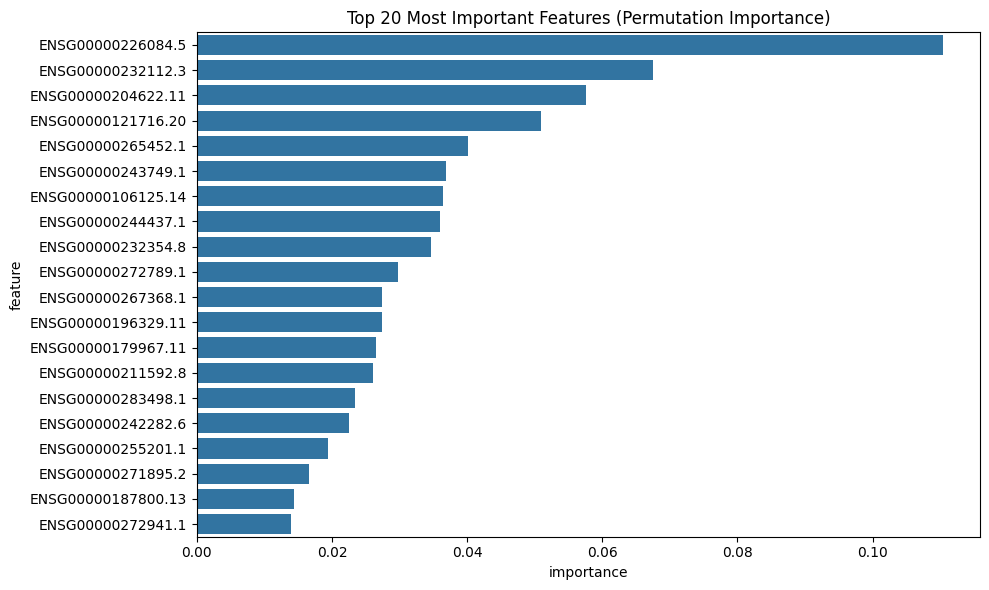

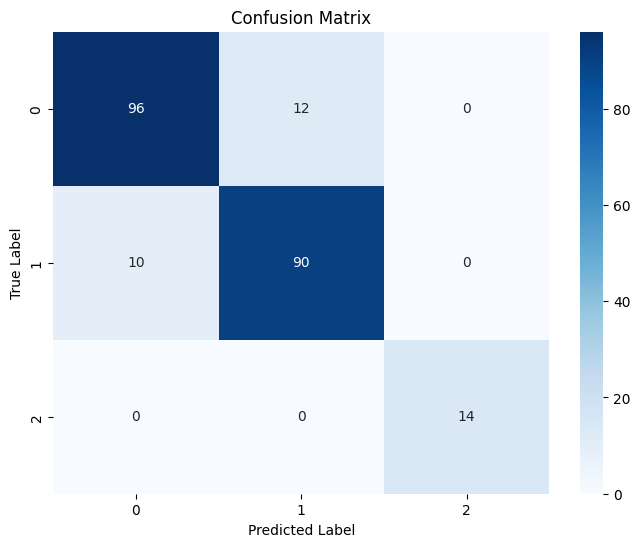

Processing feature set: ../Data/Features/RF_MI_DE_Union.csv
Initial model performance:
Accuracy: 0.8468
AUC-ROC: 0.9558
Cross-validation scores: 0.8478 (+/- 0.0405)

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       108
           1       0.83      0.83      0.83       100
           2       1.00      1.00      1.00        14

    accuracy                           0.85       222
   macro avg       0.89      0.89      0.89       222
weighted avg       0.85      0.85      0.85       222

Best parameters found: {'kernel': 'rbf', 'gamma': 'auto', 'degree': 2, 'class_weight': None, 'C': 10}

Tuned model performance:
Accuracy: 0.8514
AUC-ROC: 0.9572
Cross-validation scores: 0.8580 (+/- 0.0409)

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85       108
           1       0.83      0.84      0.84       100
           2       1.00      1.00  

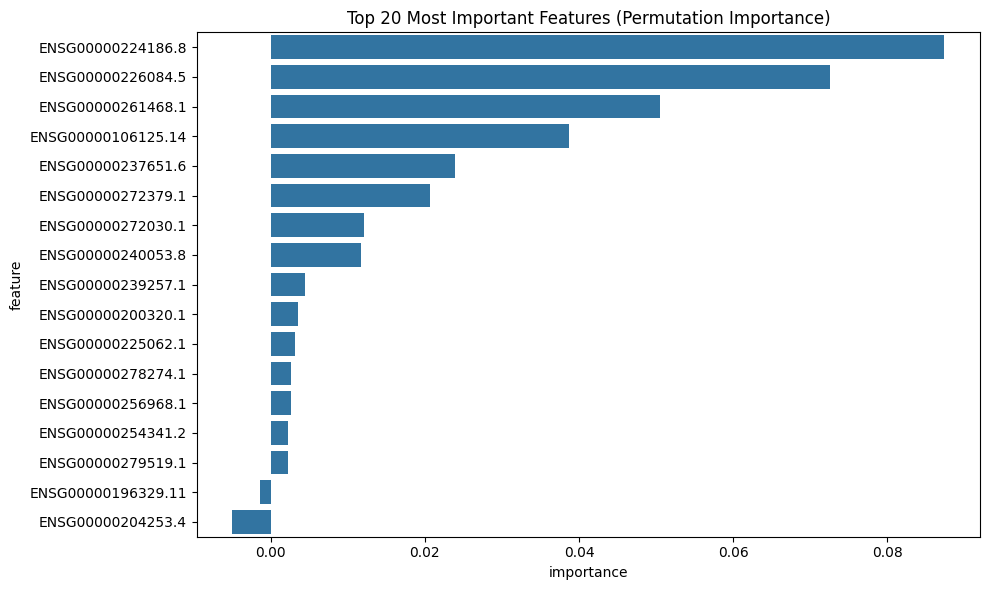

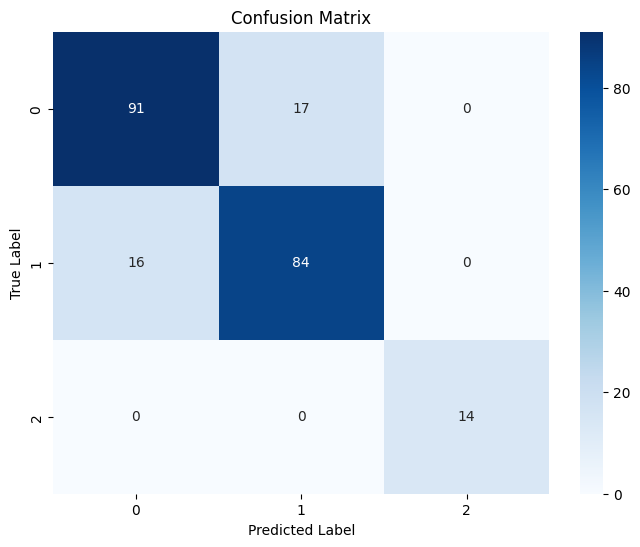

Processing feature set: ../Data/Features/MI_DE_Intersection.csv
Initial model performance:
Accuracy: 0.8514
AUC-ROC: 0.9576
Cross-validation scores: 0.8478 (+/- 0.0391)

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85       108
           1       0.83      0.84      0.84       100
           2       1.00      1.00      1.00        14

    accuracy                           0.85       222
   macro avg       0.89      0.89      0.89       222
weighted avg       0.85      0.85      0.85       222

Best parameters found: {'kernel': 'rbf', 'gamma': 0.1, 'degree': 2, 'class_weight': 'balanced', 'C': 10}

Tuned model performance:
Accuracy: 0.8604
AUC-ROC: 0.9614
Cross-validation scores: 0.8523 (+/- 0.0306)

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85       108
           1       0.83      0.86      0.85       100
           2       1.00     

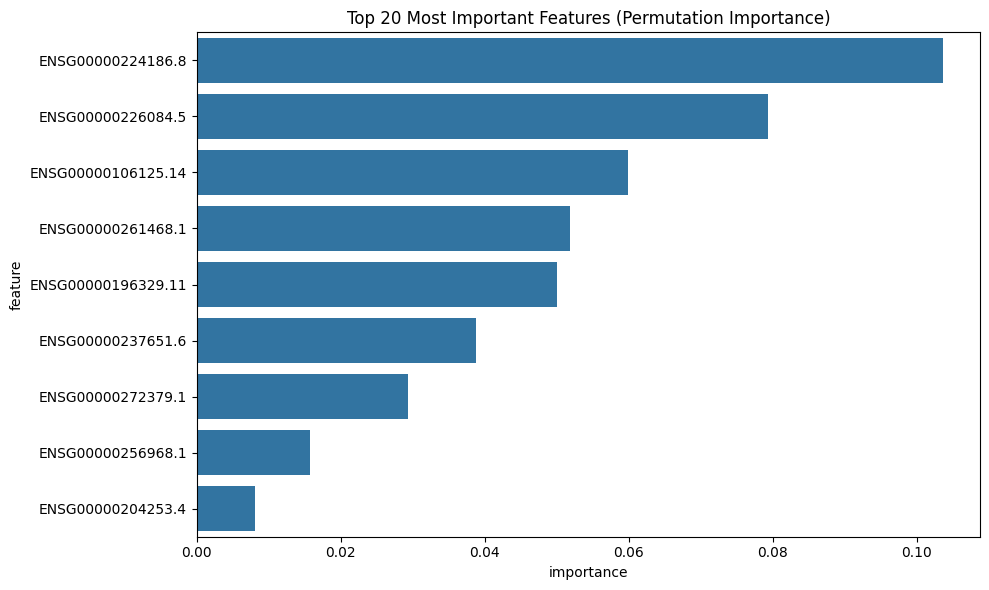

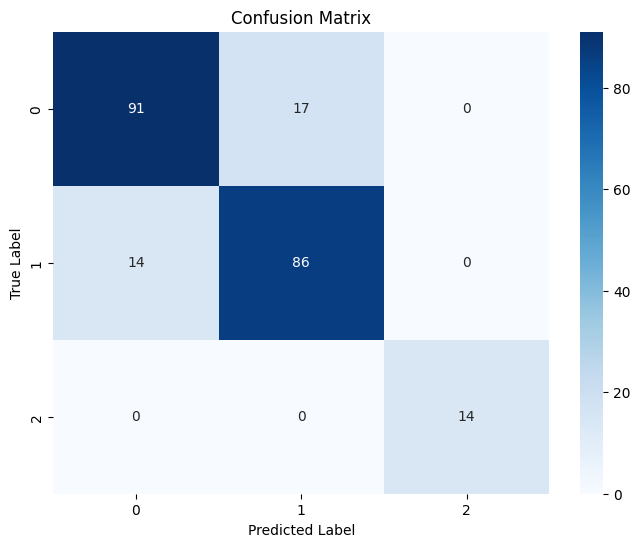

Processing feature set: ../Data/Features/RF_DE_Intersection.csv
Initial model performance:
Accuracy: 0.5721
AUC-ROC: 0.7409
Cross-validation scores: 0.5896 (+/- 0.0660)

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.58      0.57       108
           1       0.53      0.50      0.51       100
           2       1.00      1.00      1.00        14

    accuracy                           0.57       222
   macro avg       0.69      0.69      0.69       222
weighted avg       0.57      0.57      0.57       222

Best parameters found: {'kernel': 'poly', 'gamma': 1, 'degree': 3, 'class_weight': None, 'C': 100}

Tuned model performance:
Accuracy: 0.5450
AUC-ROC: 0.7448
Cross-validation scores: 0.5975 (+/- 0.0493)

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.48      0.51       108
           1       0.50      0.55      0.52       100
           2       1.00      1.00 

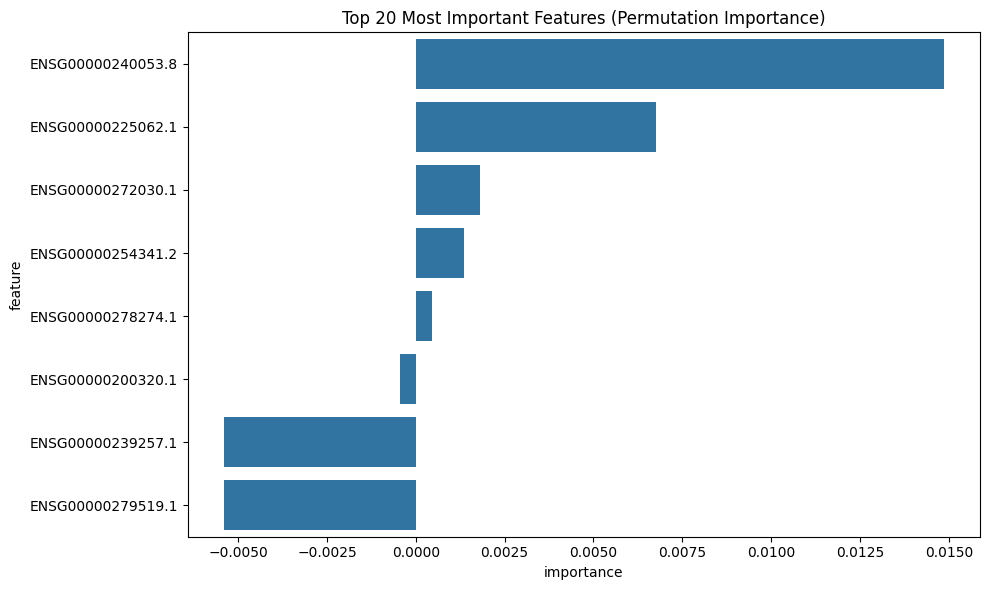

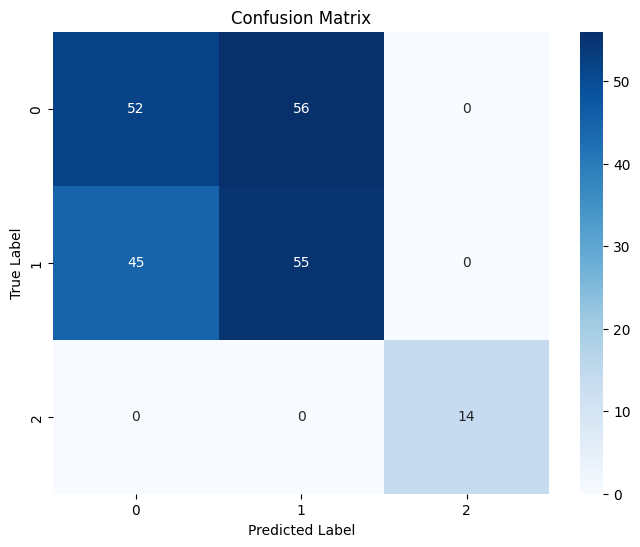

In [4]:
# Main execution
for feature_set in feature_sets:
    print(f"Processing feature set: {feature_set}")
    
    # Load and preprocess data
    X, y = load_data(expression_path, labels_path, feature_set)
    X_train, X_test, y_train, y_test = preprocess_data(X, y)
    
    # Initialize and scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize and train SVM model
    svm = SVC(random_state=42, probability=True)
    svm, initial_metrics = train_and_evaluate_model(svm, X_train_scaled, X_test_scaled, y_train, y_test)
    
    print("Initial model performance:")
    print(f"Accuracy: {initial_metrics['accuracy']:.4f}")
    print(f"AUC-ROC: {initial_metrics['auc_roc']:.4f}")
    print(f"Cross-validation scores: {initial_metrics['cv_scores'].mean():.4f} (+/- {initial_metrics['cv_scores'].std() * 2:.4f})")
    print("\nClassification Report:\n", initial_metrics['classification_report'])
    
    # Hyperparameter tuning
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['rbf', 'linear', 'poly'],
        'gamma': ['scale', 'auto', 0.1, 1],
        'class_weight': [None, 'balanced'],
        'degree': [2, 3, 4],  # Only used by poly kernel
    }
    
    svm_random = RandomizedSearchCV(
        estimator=svm, 
        param_distributions=param_grid, 
        n_iter=100, 
        cv=3, 
        verbose=0, 
        random_state=42, 
        n_jobs=-1,
        error_score='raise')
    
    svm_random.fit(X_train_scaled, y_train)
    
    print("Best parameters found:", svm_random.best_params_)
    
    # Train and evaluate tuned model
    best_svm = svm_random.best_estimator_
    best_svm, tuned_metrics = train_and_evaluate_model(best_svm, X_train_scaled, X_test_scaled, y_train, y_test)
    
    print("\nTuned model performance:")
    print(f"Accuracy: {tuned_metrics['accuracy']:.4f}")
    print(f"AUC-ROC: {tuned_metrics['auc_roc']:.4f}")
    print(f"Cross-validation scores: {tuned_metrics['cv_scores'].mean():.4f} (+/- {tuned_metrics['cv_scores'].std() * 2:.4f})")
    print("\nClassification Report:\n", tuned_metrics['classification_report'])
    
    # Plot feature importance using permutation importance
    perm_importance = permutation_importance(best_svm, X_test_scaled, y_test, n_repeats=10, random_state=42)
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': perm_importance.importances_mean
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
    plt.title('Top 20 Most Important Features (Permutation Importance)')
    plt.tight_layout()
    plt.show()
    
    # Plot confusion matrix
    plot_confusion_matrix(y_test, best_svm.predict(X_test_scaled))
    
    # Uncomment the following lines if you want to save the model and feature importance
    # joblib.dump(best_svm, f'best_svm_model_{feature_set}.joblib')
    # feature_importance.to_csv(f'feature_importance_svm_{feature_set}.csv', index=False)
    
    # print(f"Model and feature importance for {feature_set} have been saved.")
    # print("\n" + "="*50 + "\n")

Processing feature set: ../Data/Features/Random_Forest.csv
Initial model performance:
Accuracy: 0.9640
AUC-ROC: 0.9981
Cross-validation scores: 0.9675 (+/- 0.0144)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       108
           1       0.96      0.96      0.96       100
           2       1.00      1.00      1.00        14

    accuracy                           0.96       222
   macro avg       0.97      0.97      0.97       222
weighted avg       0.96      0.96      0.96       222

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Best parameters found: {'C': 29.72735057040824, 'class_weight': None, 'degree': 2, 'gamma': 0.016636406741193932, 'kernel': 'rbf'}

Tuned model performance:
Accuracy: 0.9550
AUC-ROC: 0.9962
Cross-validation scores: 0.9613 (+/- 0.0201)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       

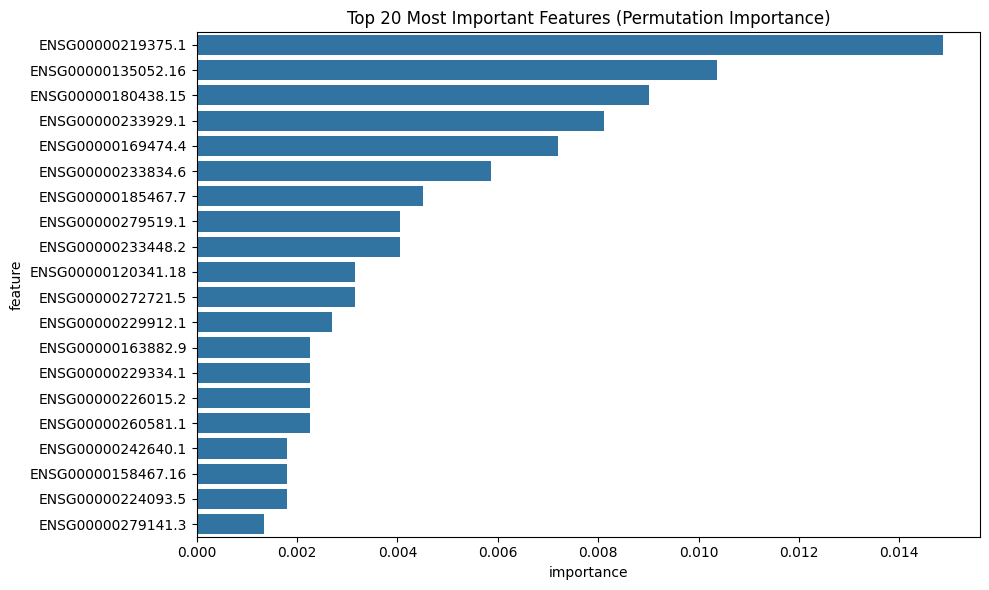

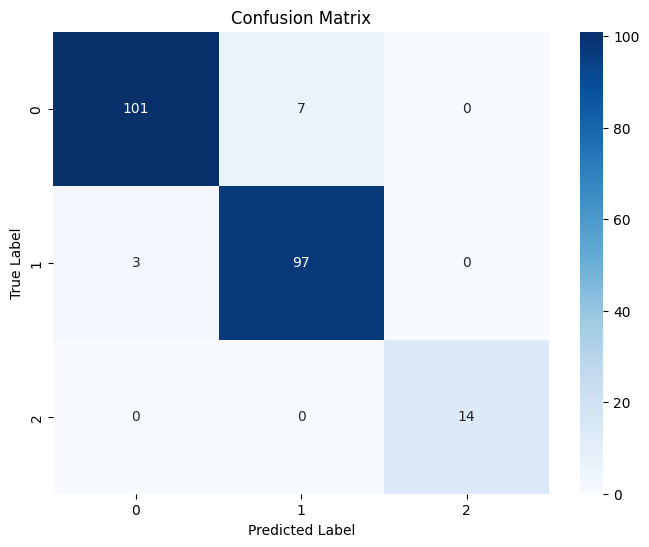

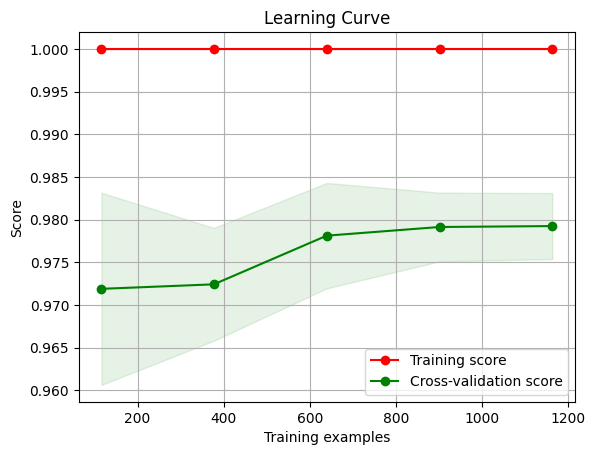

Processing feature set: ../Data/Features/RF_MI_Union.csv
Initial model performance:
Accuracy: 0.9730
AUC-ROC: 0.9985
Cross-validation scores: 0.9683 (+/- 0.0159)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.98      0.96      0.97       100
           2       1.00      1.00      1.00        14

    accuracy                           0.97       222
   macro avg       0.98      0.98      0.98       222
weighted avg       0.97      0.97      0.97       222

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Best parameters found: {'C': 39.615023600181445, 'class_weight': 'balanced', 'degree': 3, 'gamma': 0.7282719958564209, 'kernel': 'poly'}

Tuned model performance:
Accuracy: 0.9595
AUC-ROC: 0.9976
Cross-validation scores: 0.9644 (+/- 0.0150)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96   

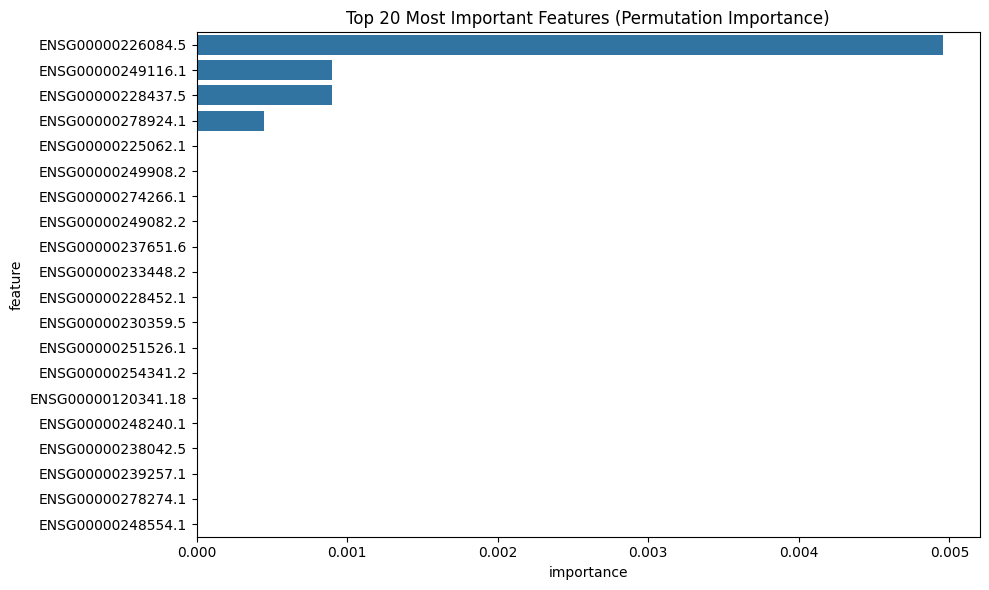

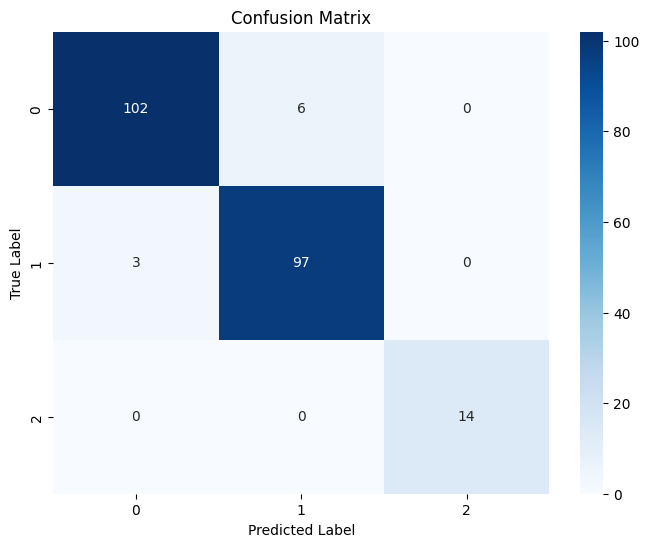

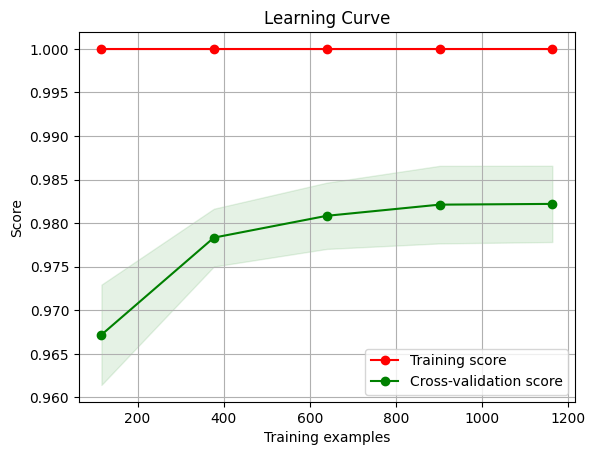

Processing feature set: ../Data/Features/RF_MI_Intersection.csv
Initial model performance:
Accuracy: 0.9640
AUC-ROC: 0.9975
Cross-validation scores: 0.9636 (+/- 0.0135)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       108
           1       0.96      0.96      0.96       100
           2       1.00      1.00      1.00        14

    accuracy                           0.96       222
   macro avg       0.97      0.97      0.97       222
weighted avg       0.96      0.96      0.96       222

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Best parameters found: {'C': 84.30914150187095, 'class_weight': None, 'degree': 5, 'gamma': 0.06723597785186586, 'kernel': 'rbf'}

Tuned model performance:
Accuracy: 0.9414
AUC-ROC: 0.9947
Cross-validation scores: 0.9629 (+/- 0.0038)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94   

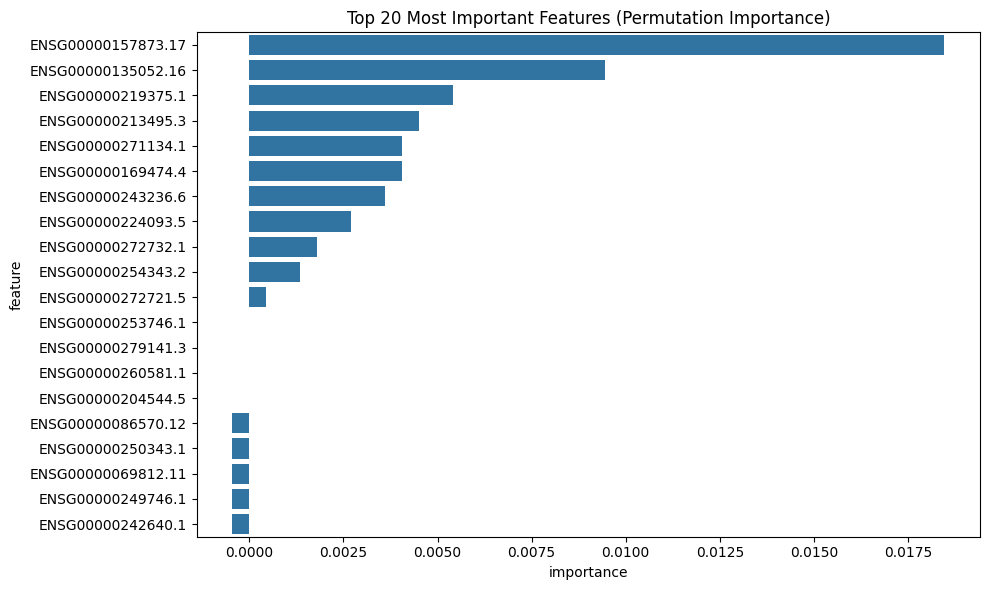

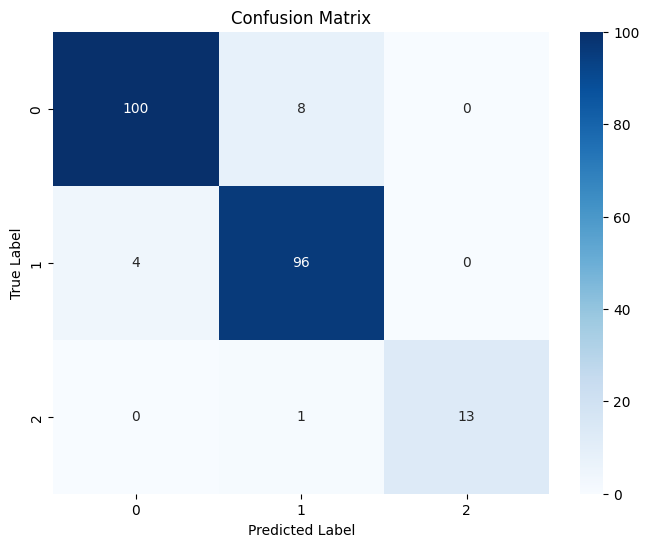

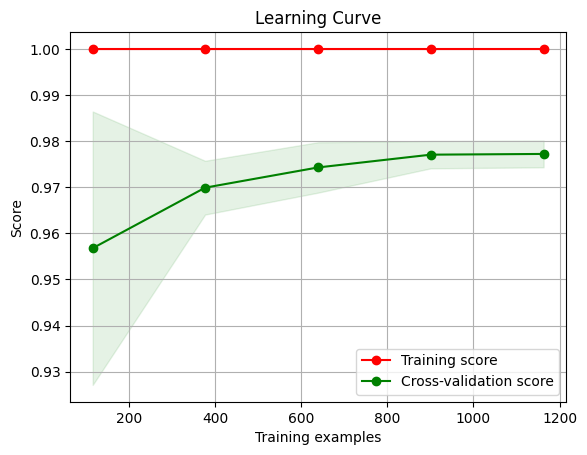

Processing feature set: ../Data/Features/NSCLC_biomarkers_de_analysis.csv
Initial model performance:
Accuracy: 0.9144
AUC-ROC: 0.9770
Cross-validation scores: 0.9211 (+/- 0.0172)

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       108
           1       0.91      0.90      0.90       100
           2       1.00      1.00      1.00        14

    accuracy                           0.91       222
   macro avg       0.94      0.94      0.94       222
weighted avg       0.91      0.91      0.91       222

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Best parameters found: {'C': 5.741157902710025, 'class_weight': 'balanced', 'degree': 5, 'gamma': 0.9395527090157502, 'kernel': 'linear'}

Tuned model performance:
Accuracy: 0.8964
AUC-ROC: 0.9789
Cross-validation scores: 0.9320 (+/- 0.0298)

Classification Report:
               precision    recall  f1-score   support

           0       0.90     

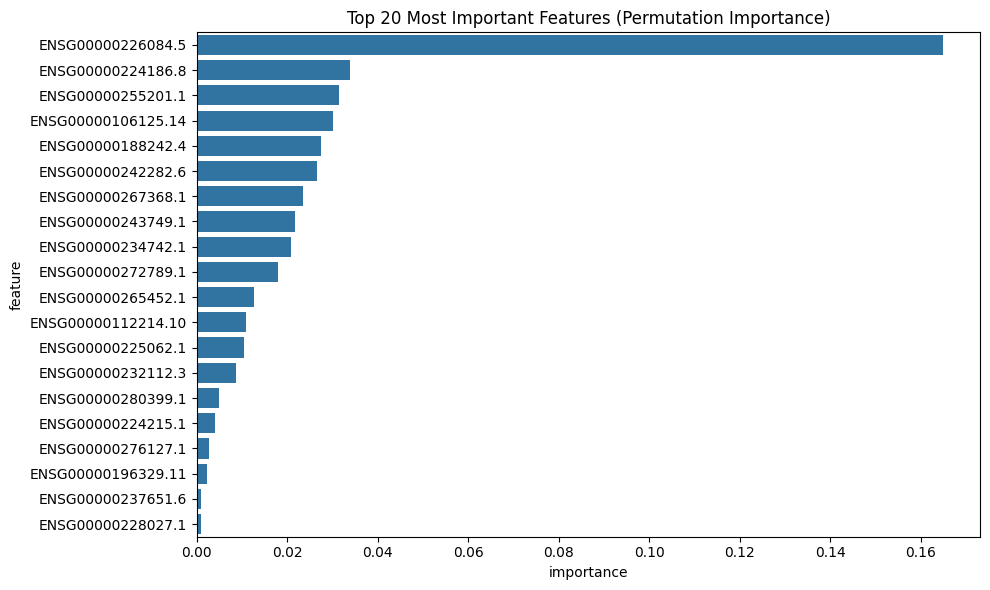

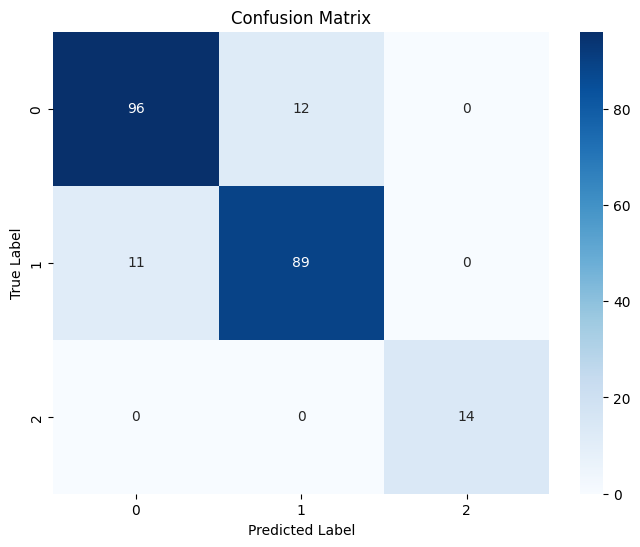

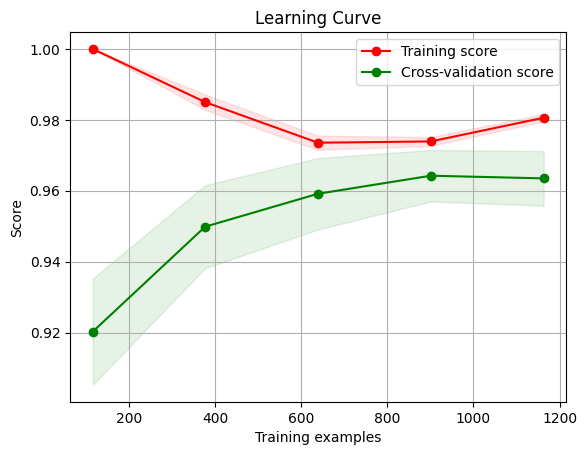

Processing feature set: ../Data/Features/NSCLC_biomarkers_50_de_analysis.csv
Initial model performance:
Accuracy: 0.8649
AUC-ROC: 0.9670
Cross-validation scores: 0.8902 (+/- 0.0276)

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       108
           1       0.84      0.86      0.85       100
           2       1.00      1.00      1.00        14

    accuracy                           0.86       222
   macro avg       0.90      0.90      0.90       222
weighted avg       0.87      0.86      0.86       222

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Best parameters found: {'C': 8.510680611499742, 'class_weight': None, 'degree': 5, 'gamma': 0.07376300636419353, 'kernel': 'linear'}

Tuned model performance:
Accuracy: 0.9189
AUC-ROC: 0.9749
Cross-validation scores: 0.9018 (+/- 0.0368)

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0

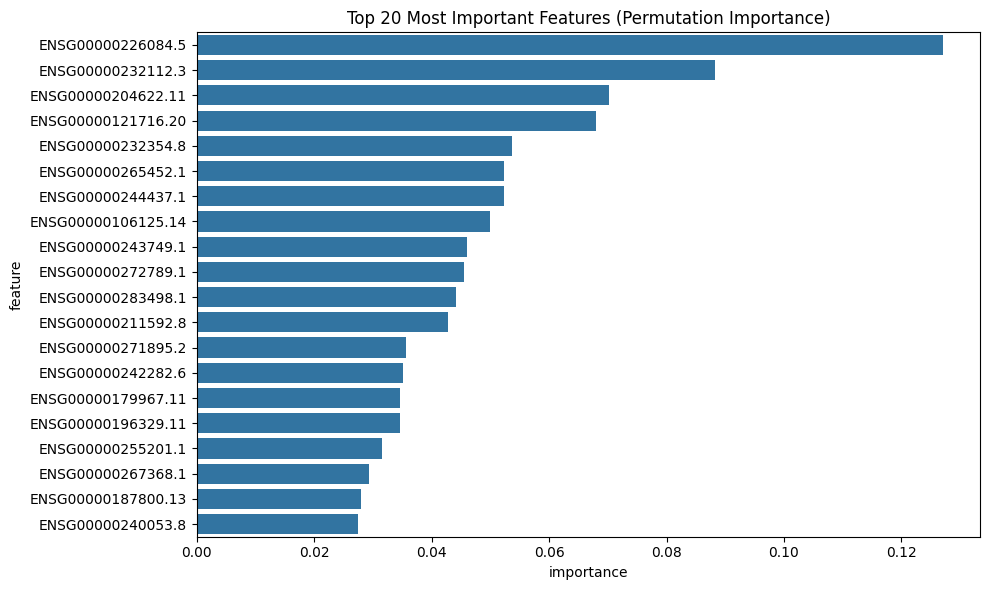

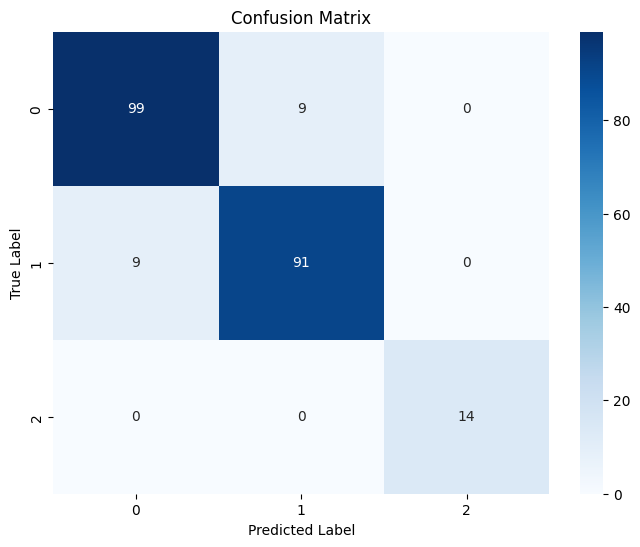

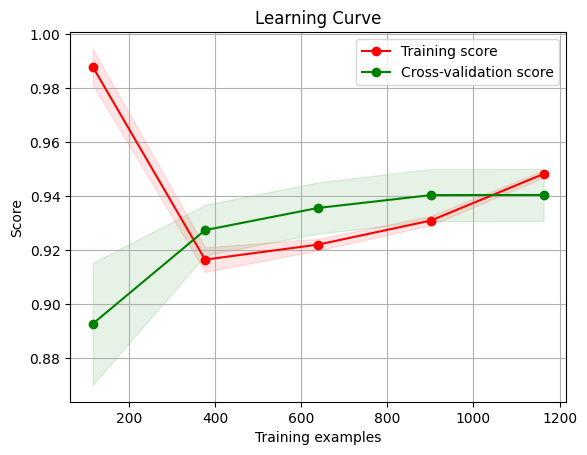

Processing feature set: ../Data/Features/RF_MI_DE_Union.csv
Initial model performance:
Accuracy: 0.8333
AUC-ROC: 0.9541
Cross-validation scores: 0.8840 (+/- 0.0328)

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.83       108
           1       0.81      0.82      0.82       100
           2       1.00      1.00      1.00        14

    accuracy                           0.83       222
   macro avg       0.88      0.88      0.88       222
weighted avg       0.83      0.83      0.83       222

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Best parameters found: {'C': 34.93366044531974, 'class_weight': None, 'degree': 2, 'gamma': 0.040186326675646256, 'kernel': 'rbf'}

Tuned model performance:
Accuracy: 0.8514
AUC-ROC: 0.9547
Cross-validation scores: 0.9018 (+/- 0.0261)

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85      

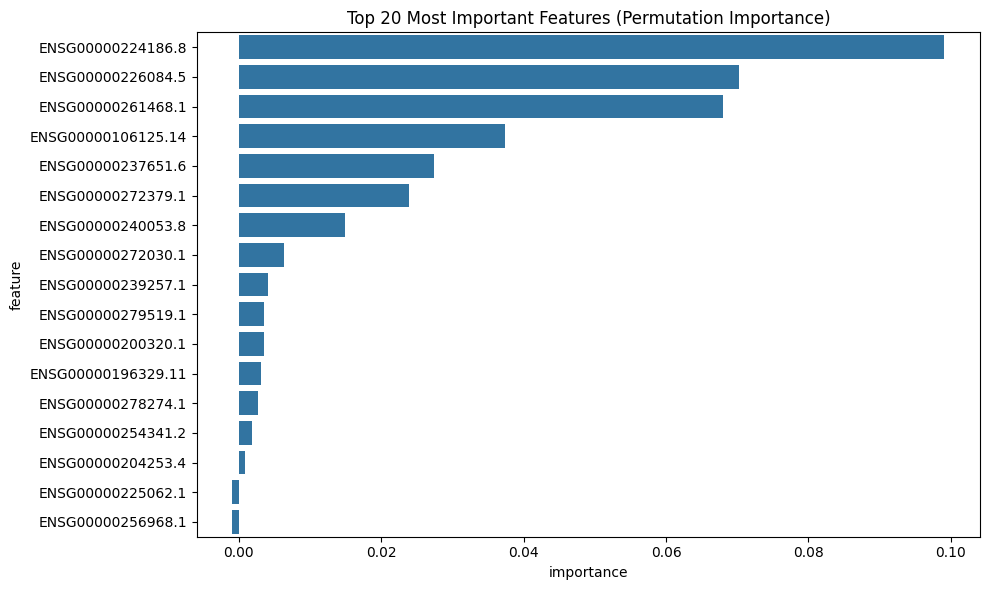

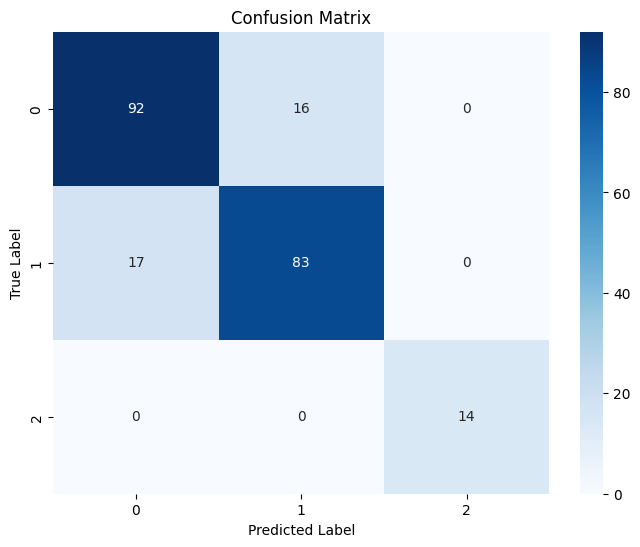

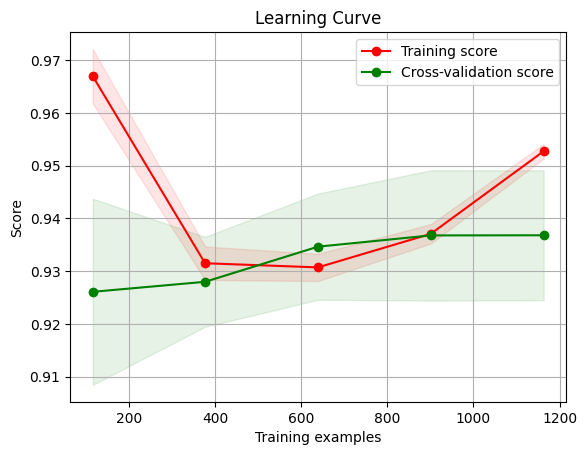

Processing feature set: ../Data/Features/MI_DE_Intersection.csv
Initial model performance:
Accuracy: 0.8378
AUC-ROC: 0.9562
Cross-validation scores: 0.8871 (+/- 0.0302)

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       108
           1       0.81      0.83      0.82       100
           2       1.00      1.00      1.00        14

    accuracy                           0.84       222
   macro avg       0.88      0.88      0.88       222
weighted avg       0.84      0.84      0.84       222

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Best parameters found: {'C': 33.1348481280914, 'class_weight': None, 'degree': 2, 'gamma': 0.00853436313407474, 'kernel': 'rbf'}

Tuned model performance:
Accuracy: 0.8604
AUC-ROC: 0.9581
Cross-validation scores: 0.8979 (+/- 0.0186)

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85    

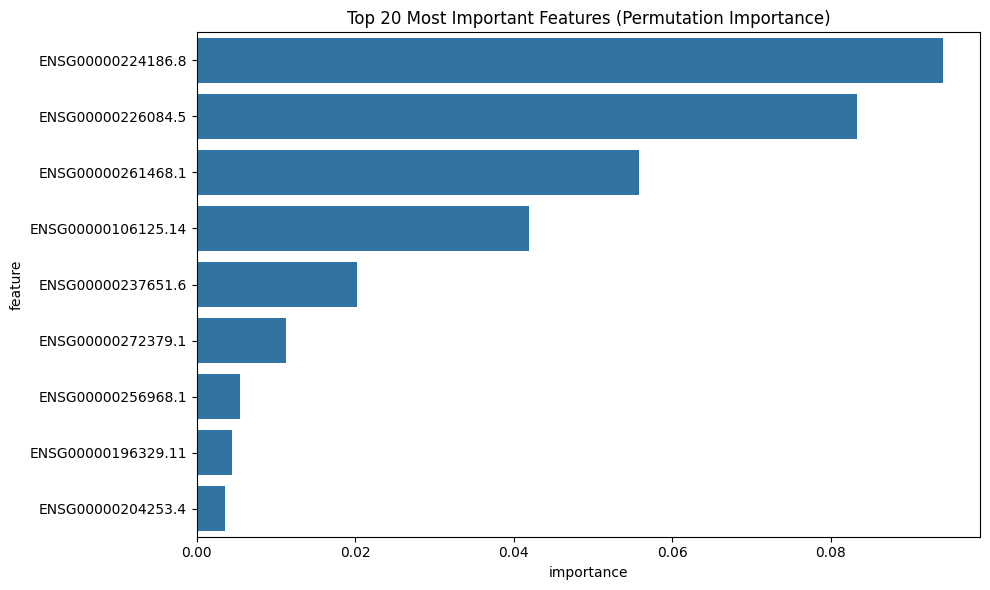

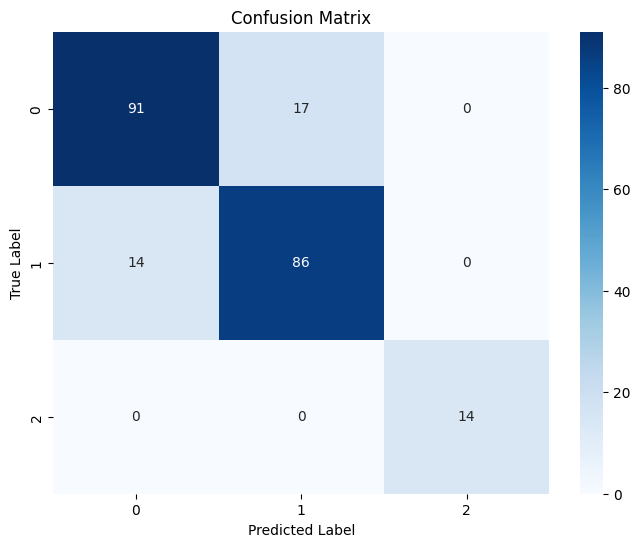

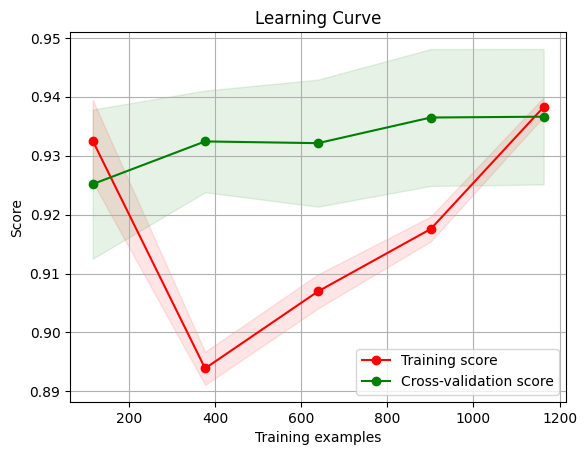

Processing feature set: ../Data/Features/RF_DE_Intersection.csv
Initial model performance:
Accuracy: 0.5450
AUC-ROC: 0.7393
Cross-validation scores: 0.6984 (+/- 0.0534)

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.40      0.46       108
           1       0.50      0.64      0.56       100
           2       1.00      1.00      1.00        14

    accuracy                           0.55       222
   macro avg       0.68      0.68      0.67       222
weighted avg       0.55      0.55      0.54       222

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Best parameters found: {'C': 3.3315951109650466, 'class_weight': None, 'degree': 2, 'gamma': 0.41220672087218624, 'kernel': 'rbf'}

Tuned model performance:
Accuracy: 0.5811
AUC-ROC: 0.7487
Cross-validation scores: 0.7216 (+/- 0.0450)

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.46      0.52  

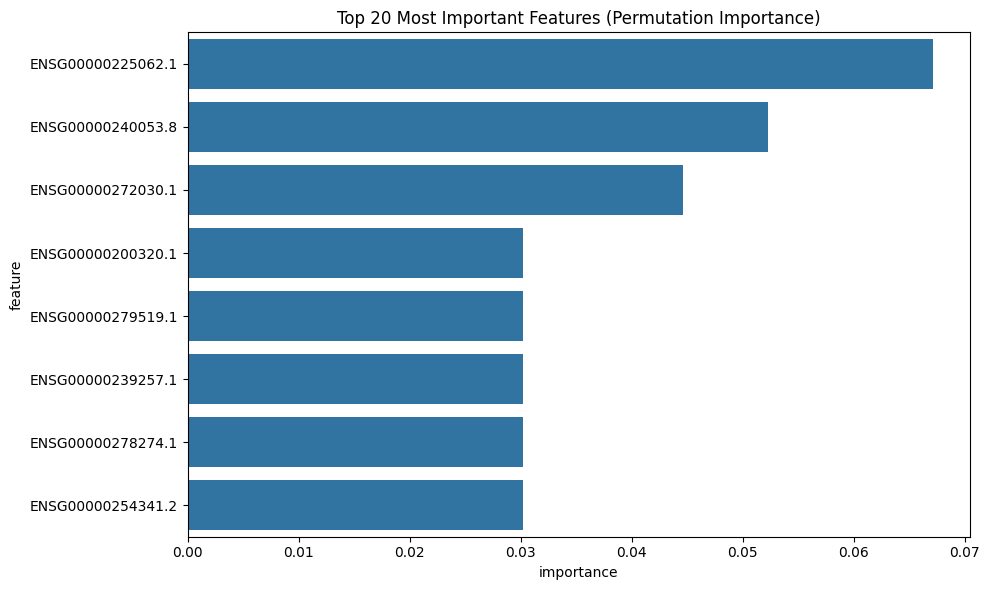

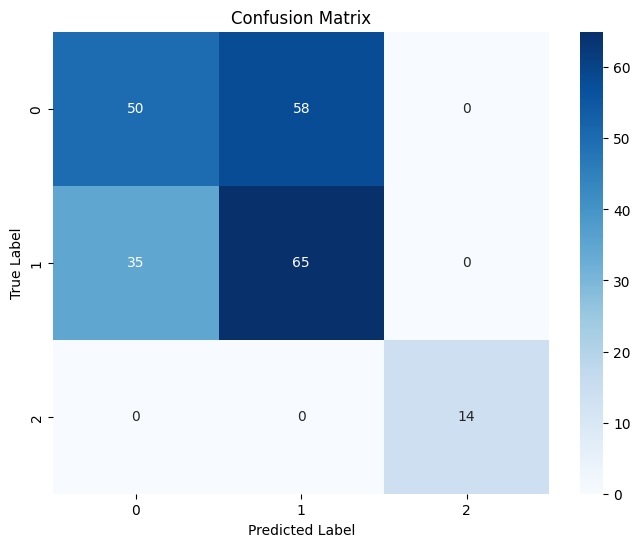

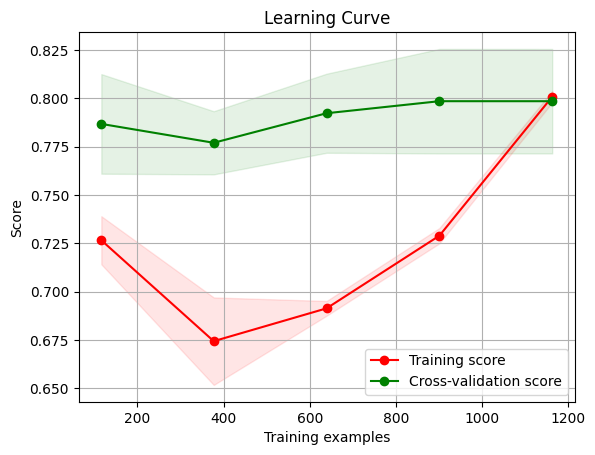

In [8]:
# Main execution
for feature_set in feature_sets:
    print(f"Processing feature set: {feature_set}")
    
    # Load and preprocess data
    X, y = load_data(expression_path, labels_path, feature_set)
    X_train, X_test, y_train, y_test = preprocess_data(X, y)
    
    # Initialize and scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Apply SMOTE to handle class imbalance
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
    
    # Initialize and train SVM model
    svm = SVC(random_state=42, probability=True)
    svm, initial_metrics = train_and_evaluate_model(svm, X_train_resampled, X_test_scaled, y_train_resampled, y_test)
    
    print("Initial model performance:")
    print(f"Accuracy: {initial_metrics['accuracy']:.4f}")
    print(f"AUC-ROC: {initial_metrics['auc_roc']:.4f}")
    print(f"Cross-validation scores: {initial_metrics['cv_scores'].mean():.4f} (+/- {initial_metrics['cv_scores'].std() * 2:.4f})")
    print("\nClassification Report:\n", initial_metrics['classification_report'])
    
    # Expanded hyperparameter tuning
    param_grid = {
        'C': uniform(0.1, 100),  # Continuous distribution for C
        'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
        'gamma': uniform(0.001, 1),  # Continuous distribution for gamma
        'class_weight': [None, 'balanced'],
        'degree': [2, 3, 4, 5],  # Expanded degree options for poly kernel
    }
    
    # Implement Stratified K-Fold cross-validation
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    
    svm_random = RandomizedSearchCV(
        estimator=svm, 
        param_distributions=param_grid, 
        n_iter=200,  # Increased number of iterations
        cv=cv,  # Use Stratified K-Fold
        verbose=1, 
        random_state=42, 
        n_jobs=-1,
        scoring=custom_scorer,  # Use custom scorer that balances accuracy and AUC-ROC
        error_score='raise')
    
    svm_random.fit(X_train_resampled, y_train_resampled)
    
    print("Best parameters found:", svm_random.best_params_)
    
    # Train and evaluate tuned model
    best_svm = svm_random.best_estimator_
    best_svm, tuned_metrics = train_and_evaluate_model(best_svm, X_train_resampled, X_test_scaled, y_train_resampled, y_test)
    
    print("\nTuned model performance:")
    print(f"Accuracy: {tuned_metrics['accuracy']:.4f}")
    print(f"AUC-ROC: {tuned_metrics['auc_roc']:.4f}")
    print(f"Cross-validation scores: {tuned_metrics['cv_scores'].mean():.4f} (+/- {tuned_metrics['cv_scores'].std() * 2:.4f})")
    print("\nClassification Report:\n", tuned_metrics['classification_report'])
    
    # Calculate feature importance using permutation importance
    perm_importance = permutation_importance(best_svm, X_test_scaled, y_test, n_repeats=10, random_state=42)
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': perm_importance.importances_mean
    }).sort_values('importance', ascending=False)
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
    plt.title('Top 20 Most Important Features (Permutation Importance)')
    plt.tight_layout()
    plt.show()
    
    # Plot confusion matrix
    plot_confusion_matrix(y_test, best_svm.predict(X_test_scaled))
    
#     # Save the model and feature importance
#     joblib.dump(best_svm, f'best_svm_model_{feature_set}.joblib')
#     pd.DataFrame({
#         'feature': X.columns,
#         'importance': np.abs(shap_values).mean(0)
#     }).sort_values('importance', ascending=False).to_csv(f'feature_importance_svm_{feature_set}.csv', index=False)
    
#     print(f"Model and feature importance for {feature_set} have been saved.")
#     print("\n" + "="*50 + "\n")

    # Plot learning curve for the best model
    plot_learning_curve(best_svm, X_train_resampled, y_train_resampled, cv=cv)